# 载入数据

In [1]:
import pandas as pd
df = pd.read_excel('./job_detail.xlsx')
# 将载入的数据修改为列表
df['职位详情'] = [eval(df['职位详情'][i]) for i in range(len(df['职位详情']))]
df = df.drop(['Unnamed: 0'], axis=1)

In [2]:
# 清理与输入关键词相同的词汇
def clean_self(self, self_word):
    result = []
    for temp in self:
        middle = []
        if temp is not None:
            for word in temp:
                if self_word not in word:
                    middle.append(word)
        result.append(middle)
    return result

# 制作学历与其他项目关系图

### 不同职位类别下的学历分布图

In [3]:
import re

In [4]:
def get_job_type(search_job, df):
    # 将搜索到的Java（不区分大小写）传入待画图的数据中
    this = df[df['职位名称'].str.contains(search_job,case= False)]
    this = this.reset_index(drop = True)
#     print('数据总条数：{}'.format(len(this)))
    return this

In [5]:
# 从loc位置开始向wait表中添加职位类别为job_type的数据
def add_data(wait, this, loc, job_type):
    for i in range(len(this)):
        wait.loc[loc + i, '职位类别'] = job_type
        wait.loc[loc + i, '学历要求'] = this['学历要求'][i]
    loc += i
    return wait, loc

In [6]:
# 创建空的DataFrame对象
wait = pd.DataFrame()
# 建立两列数据设置列名
wait['职位类别'] = None
wait['学历要求'] = None
loc = 0
word_list = ['java', 'python', '大数据', '算法', 'php', '前端', '数据分析']
for j in range(len(word_list)):
    this = get_job_type(word_list[j], df)
    wait, loc = add_data(wait, this, loc, word_list[j])
# display(wait)

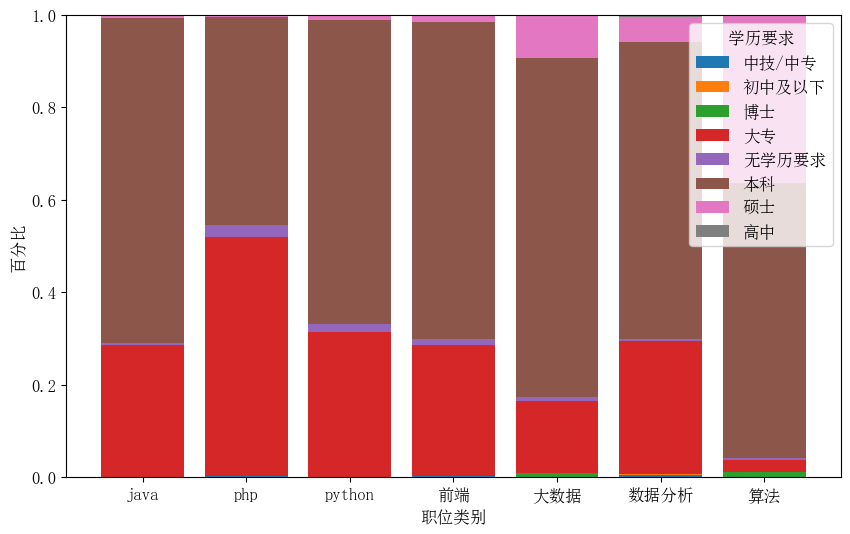

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 统计每个职位类别中各个学历要求的数量
counts = wait.groupby(['学历要求', '职位类别']).size().unstack()

# 计算每个学历要求在其所在分组内的百分比
totals = counts.sum(axis=1)
percentages = counts.div(counts.sum(axis=0), axis=1)
# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)

# 绘制条形图
fig, ax = plt.subplots(figsize=(10, 6))

categories = percentages.index
for i, category in enumerate(categories):
    ax.bar(
        percentages.columns,
        percentages.loc[category],
        bottom = percentages.iloc[:i].sum(),
        label = category
    )

ax.set_xlabel('职位类别')
ax.set_ylabel('百分比')
ax.legend(title='学历要求')
plt.show()


### 不同城市的学历分布图

In [8]:
this = df

In [9]:
# 使用 replace 函数批量修改数据
this['工作所在省份'] = this['工作所在省份'].replace({'内蒙古自治区': '内蒙古'})
this['工作所在省份'] = this['工作所在省份'].replace({'宁夏回族自治区': '宁夏'})
this['工作所在省份'] = this['工作所在省份'].replace({'广西壮族自治区': '广西省'})
this['工作所在省份'] = this['工作所在省份'].replace({'新疆维吾尔自治区': '新疆'})
this['工作所在省份'] = this['工作所在省份'].replace({'西藏自治区': '西藏'})

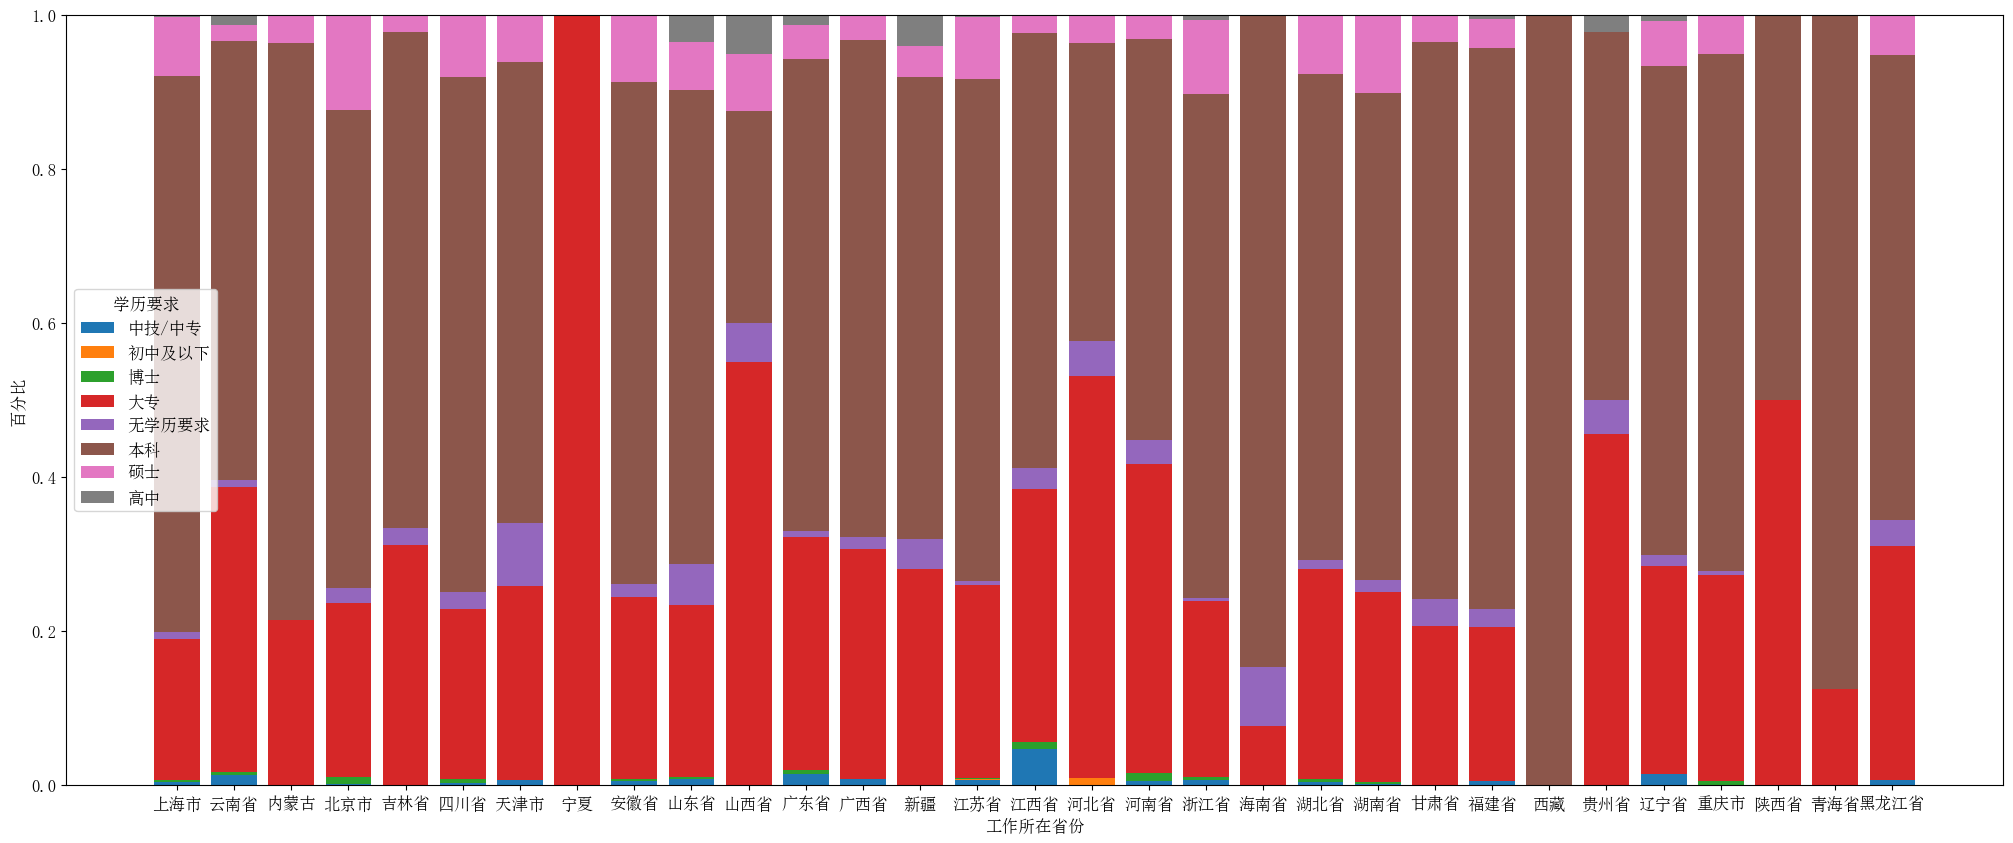

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 统计每个职位类别中各个学历要求的数量
counts = df.groupby(['学历要求', '工作所在省份']).size().unstack()

# 计算每个学历要求在其所在分组内的百分比
totals = counts.sum(axis=1)
percentages = counts.div(counts.sum(axis=0), axis=1)
# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)
# 设置画布颜色
# plt.gcf().set_facecolor('lightblue')
# Create a figure object
fig = plt.figure(figsize=(25,10))
# Add a subplot to the figure
ax = fig.add_subplot()
ax.patch.set_facecolor('white')
# # 绘制条形图
# fig, ax = plt.subplots(figsize=(10, 6))

categories = percentages.index
for i, category in enumerate(categories):
    ax.bar(
        percentages.columns,
        percentages.loc[category],
        bottom = percentages.iloc[:i].sum(),
        label = category
    )

ax.set_xlabel('工作所在省份')
ax.set_ylabel('百分比')
ax.legend(title='学历要求')
plt.show()


### 不同公司行业的学历分布图

In [11]:
search_job = 'java'

In [12]:
# 将搜索到的Java（不区分大小写）传入待画图的数据中
this = df[df['职位名称'].str.contains(search_job, case= False)]

this = this.reset_index(drop = True)
print('数据总条数：{}'.format(len(this)))

数据总条数：2528


In [13]:
import pandas as pd
# 将其中的字符串数据修改为列表
this['公司行业'] = [eval(this['公司行业'][i]) for i in range(len(this['公司行业']))]


In [14]:
# 将公司行业列表中的几列数据分别扩展成几行
def add_list(this):
    new_data = []
    for i in range(len(this)):
#         print(type(this['公司行业'][i]) is list)
        if (type(this['公司行业'][i]) is list):
            wait = this['公司行业'][i]
            for temp in range(len(wait)):
                if temp ==0:
                    this.loc[i, '公司行业'] = wait[temp]
                else:
                    new_row = this.iloc[i].copy()  # 拷贝原始数据行
        #             print(wait[temp])
                    new_row['公司行业'] = wait[temp]  # 替换公司行业列的值
                    new_data.append(new_row)
    # 将新行组成的列表转为DataFrame对象并合并到原表中
    new_df = pd.DataFrame(new_data, columns=this.columns)
    this = pd.concat([this, new_df], ignore_index=True)
    return this
    
this = add_list(this)


In [15]:
this

,职位名称,职位详情,学历要求,工作经验要求,薪资待遇,工作城市,招聘公司,公司类型,公司行业,发布时间,数据所在模块,工作所在省份
0,Java高级开发工程师,"[java, springmvc, springboot, mybatis, restful...",本科,5,15000-20000·15薪,成都-天府新区,商飞软件有限公司,国企,航天/航空,02-18,高级软件工程师,四川省
1,Java高级开发工程师 (职位编号：gao3),"[java编程语言, 基于socket, 消息机制的开发, linux, windows平台...",本科,5,16666-25000,上海-杨浦区,上海维祥信息技术有限公司,民营,计算机软件,02-18,高级软件工程师,上海市
2,JAVA开发工程师,"[j2ee, springboot, springcloud, spring, spring...",大专,5,15000-20000,合肥,东华软件智能科技有限公司,民营,原材料和加工,02-18,高级软件工程师,安徽省
3,Java高级开发工程师(RZK002),"[java, j2ee, springboot, springcloud, spingmvc...",本科,5,15000-20000,武汉-硚口区,湖北普罗格科技股份有限公司,民营,计算机软件,02-18,高级软件工程师,湖北省
4,Java前端开发工程师,"[html, javascript, css, es6, es7, mvc, node, v...",本科,3,10000-15000,杭州-萧山区,杭州驿德科技有限公司,民营,计算机软件,02-18,前端开发,浙江省
...,...,...,...,...,...,...,...,...,...,...,...,...
3904,Java高级开发工程师（金融行业）,"[java, springboot, ssh, ssm, mysql, oracle, mq...",本科,5,15000-22000,上海-浦东新区,上海金指软件技术有限公司,民营,计算机软件,03-11,高级软件工程师,上海市
3905,Senior Engineer (Java),"[java, javaee, struts, jsf, spring, ejb, hiber...",本科,3,15000-25000,苏州-工业园区,力信通信息科技（苏州）有限公司,外资（非欧美）,计算机服务(系统、数据服务、维修),03-11,高级软件工程师,江苏省
3906,JAVA软件工程师,"[j2ee平台, 代码编写, 单元测试, 软件设计模式, uml, jsf, spring,...",大专,5,15000-25000,上海-嘉定区,苏州维莱科软件有限公司,民营,计算机服务(系统、数据服务、维修),03-11,高级软件工程师,上海市
3907,高级Java架构师,"[软件工程, java开发, 高性能, 高并发, 大数据量, 系统架构设计, io, 多线程...",本科,5,15000-25000,武汉,武汉康普常青软件技术股份有限公司,已上市,仪器仪表/工业自动化,03-10,高级软件工程师,湖北省


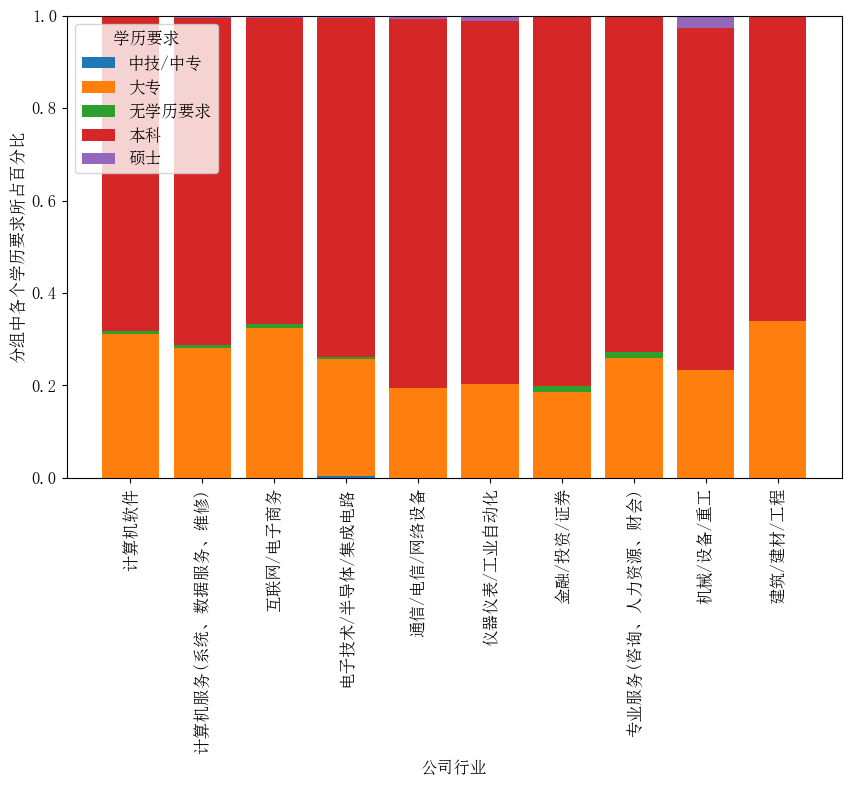

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 统计每个公司行业中各个学历要求的数量
counts = this.groupby(['学历要求', '公司行业']).size().unstack()

# 只保留出现次数最多的五个行业
top_industries = counts.sum(axis=0).nlargest(10).index
counts = counts[top_industries]

# 计算每个学历要求在其所在分组内的百分比
totals = counts.sum(axis=1)
percentages = counts.div(counts.sum(axis=0), axis=1)

# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)

# 创建画布和子图
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制条形图
categories = percentages.index
for i, category in enumerate(categories):
    ax.bar(
        percentages.columns,
        percentages.loc[category],
        bottom=percentages.iloc[:i].sum(),
        label=category,
        width = 0.8,  # 设置每个矩形的宽度为0.8个单位，默认值为0.8
#         align = 'edge'  # 将矩形左边沿对齐于x轴上的刻度
    )
# 设置x轴刻度和标签
ax.set_xticks(range(len(percentages.columns)))
ax.set_xticklabels(percentages.columns, rotation=90)

ax.set_xlabel('公司行业')
ax.set_ylabel('分组中各个学历要求所占百分比')
ax.legend(title='学历要求')
plt.show()


### 不同公司类型的学历分布图

In [9]:
search_job = 'java'
# 将搜索到的Java（不区分大小写）传入待画图的数据中
this = df[df['职位名称'].str.contains(search_job,case= False)]
this['职位详情'] = clean_self(this['职位详情'], search_job)
this = this.reset_index(drop = True)
print('数据总条数：{}'.format(len(this)))

数据总条数：2528


C:\Users\Gimes\AppData\Local\Temp\ipykernel_8484\1325713218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this['职位详情'] = clean_self(this['职位详情'], search_job)


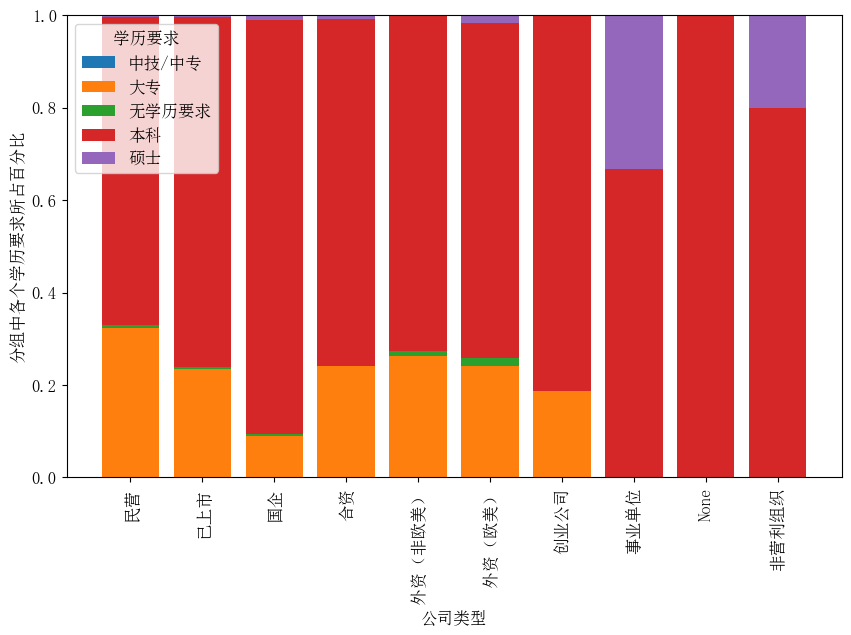

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 统计每个公司行业中各个学历要求的数量
counts = this.groupby(['学历要求', '公司类型']).size().unstack()

# 只保留出现次数最多的五个行业
top_industries = counts.sum(axis=0).nlargest(10).index
counts = counts[top_industries]

# 计算每个学历要求在其所在分组内的百分比
totals = counts.sum(axis=1)
percentages = counts.div(counts.sum(axis=0), axis=1)

# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)

# 创建画布和子图
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制条形图
categories = percentages.index
for i, category in enumerate(categories):
    ax.bar(
        percentages.columns,
        percentages.loc[category],
        bottom=percentages.iloc[:i].sum(),
        label=category,
        width = 0.8,  # 设置每个矩形的宽度为0.8个单位，默认值为0.8
#         align = 'edge'  # 将矩形左边沿对齐于x轴上的刻度
    )
# 设置x轴刻度和标签
ax.set_xticks(range(len(percentages.columns)))
ax.set_xticklabels(percentages.columns, rotation=90)

ax.set_xlabel('公司类型')
ax.set_ylabel('分组中各个学历要求所占百分比')
ax.legend(title='学历要求')
plt.show()
